In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### 1. Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
s = df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Seperate X and Y feature

In [5]:
X = df.drop(columns=['Type','TWF','HDF','PWF','OSF','RNF','Machine failure'])
Y = df[['Machine failure']]

In [6]:
X.head()

,id,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0,L50096,300.6,309.6,1596,36.1,140
1,1,M20343,302.6,312.1,1759,29.1,200
2,2,L49454,299.3,308.5,1805,26.5,25
3,3,L53355,301.0,310.9,1524,44.3,197
4,4,M24050,298.0,309.0,1641,35.4,34


###  cat con seperation

In [7]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [8]:
cat

['Product ID']

In [9]:
con

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

### Create a simple Sklearn pipeline for feature selection
1. ordinal Encoding - Categorical Features

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [11]:
# Numeric pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal',OrdinalEncoder())])

# Combine cat and con pipelines
pre1 = ColumnTransformer([('num',num_pipe, con),
                          ('cat',cat_pipe, cat)])

In [12]:
X_pre = pre1.fit_transform(X)
X_pre

array([[-1.73203811e+00,  3.95880302e-01, -2.46230381e-01, ...,
        -4.99711154e-01,  5.56416898e-01,  2.75200000e+03],
       [-1.73201272e+00,  1.46985559e+00,  1.55860483e+00, ...,
        -1.32302768e+00,  1.49443273e+00,  8.62000000e+03],
       [-1.73198733e+00, -3.02203631e-01, -1.04035788e+00, ...,
        -1.62883096e+00, -1.24144677e+00,  2.34400000e+03],
       ...,
       [ 1.73198733e+00,  3.42181538e-01,  1.34202461e+00, ...,
        -2.17431203e-01,  1.71330309e+00,  5.50200000e+03],
       [ 1.73201272e+00,  9.86566708e-01,  6.92283930e-01, ...,
         6.99978641e-01, -9.75675621e-01,  5.02400000e+03],
       [ 1.73203811e+00, -1.59097397e+00, -1.32913151e+00, ...,
        -1.23337885e-01,  1.94780704e+00,  1.45300000e+03]])

In [13]:
cols = pre1.get_feature_names_out()
cols

array(['num__id', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'num__Rotational speed [rpm]',
       'num__Torque [Nm]', 'num__Tool wear [min]', 'cat__Product ID'],
      dtype=object)

In [14]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],cat__Product ID
0,-1.732038,0.395880,-0.246230,0.545416,-0.499711,0.556417,2752.0
1,-1.732013,1.469856,1.558605,1.720308,-1.323028,1.494433,8620.0
2,-1.731987,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,2344.0
3,-1.731962,0.610675,0.692284,0.026445,0.464745,1.447532,4704.0
4,-1.731937,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,9727.0


### Calculating Mutual Information Scores

In [15]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00012092, 0.00545409, 0.00193625, 0.01915566, 0.0193964 ,
       0.00645285, 0.01827051])

In [16]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

num__Torque [Nm]                0.019396
num__Rotational speed [rpm]     0.019156
cat__Product ID                 0.018271
num__Tool wear [min]            0.006453
num__Air temperature [K]        0.005454
num__Process temperature [K]    0.001936
num__id                         0.000121
dtype: float64

<Axes: title={'center': 'Mutual Information Score'}>

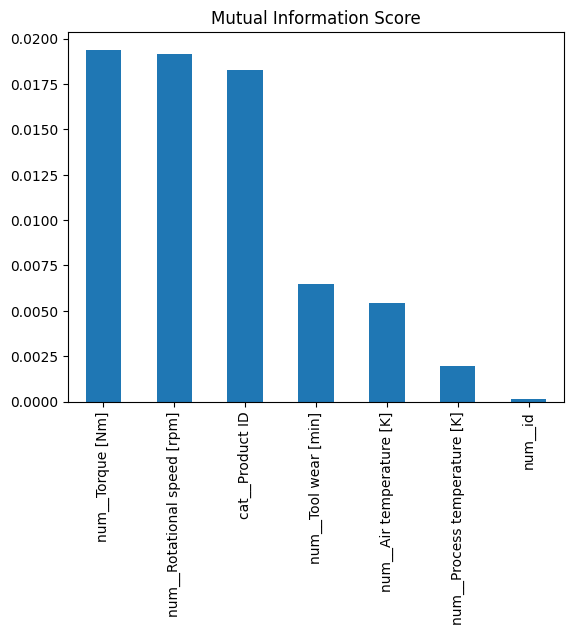

In [17]:
mi.plot(kind='bar',title='Mutual Information Score')

In [18]:
sel_cols = list(mi[0:6].index)
sel_cols

['num__Torque [Nm]',
 'num__Rotational speed [rpm]',
 'cat__Product ID',
 'num__Tool wear [min]',
 'num__Air temperature [K]',
 'num__Process temperature [K]']

In [19]:
# Approach 2 Seleect top n Features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif, k=6)
sel_features = sel.fit_transform(X_pre, Y)

In [20]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'cat__Product ID'], dtype=object)

In [21]:
sel_cols[0].split('__')[1]
sel_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'cat__Product ID'], dtype=object)

In [22]:
sel_cols[0].split('__')[1]

'Air temperature [K]'

In [23]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [24]:
imp_cols

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Product ID']

In [25]:
X_sel = X[imp_cols]
X_sel

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Product ID
0,300.6,309.6,1596,36.1,140,L50096
1,302.6,312.1,1759,29.1,200,M20343
2,299.3,308.5,1805,26.5,25,L49454
3,301.0,310.9,1524,44.3,197,L53355
4,298.0,309.0,1641,35.4,34,M24050
...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,M22284
136425,297.5,308.5,1447,49.1,2,H38017
136426,300.5,311.8,1524,38.5,214,L54690
136427,301.7,310.9,1447,46.3,42,L53876


In [26]:
## Cat, Con for Selected Features
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [27]:
cat_sel

['Product ID']

In [28]:
con_sel

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

### Select a pipeline

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con_sel),
                          ('cat',cat_pipe2, cat_sel)])

In [31]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

<136429x9981 sparse matrix of type '<class 'numpy.float64'>'
	with 818574 stored elements in Compressed Sparse Row format>

In [32]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', ..., 'cat__Product ID_M24855',
       'cat__Product ID_M24857', 'cat__Product ID_M24859'], dtype=object)

### Train test split

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

### Evaluate Algorithms 

In [34]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



In [35]:
dct = {'LogisticRegression': LogisticRegression(),
       'DecisionTree ': DecisionTreeClassifier(),
       'RandomForest': RandomForestClassifier(),
       'GradientBoosting': GradientBoostingClassifier()} 

In [36]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree ', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier())])

In [37]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model on training data
    model.fit(xtrain, ytrain)

    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    # Calculate F1 scores Training
    f1_tr = f1_score(ytrain, ypred_tr)

    # Calculate F1 Cross validated results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_tr_cv = scores.mean()

    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)

    # Append all values in list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

    # Print the results
    print(f'Model Name : {name}\n')
    print(f'F1 Training : {f1_tr:.4f}')
    print(f'F1 Training CV : {f1_tr_cv:.4f}')
    print(f'F1 Testing : {f1_ts:.4f}')
    print('\n===========================================\n')

Model Name : LogisticRegression

F1 Training : 0.1587
F1 Training CV : 0.1061
F1 Testing : 0.1523


Model Name : DecisionTree 

F1 Training : 0.9873
F1 Training CV : 0.3863
F1 Testing : 0.4083


Model Name : RandomForest

F1 Training : 0.9871
F1 Training CV : 0.3270
F1 Testing : 0.3728


Model Name : GradientBoosting

F1 Training : 0.4296
F1 Training CV : 0.3303
F1 Testing : 0.3549


